In [1]:
import cv2 

dataset_folder_path = 'C:/git/IAClass/14_run_deports_cnn/datasets/'
test_folder_path = 'C:/git/IAClass/14_run_deports_cnn/test/'


img = cv2.imread(dataset_folder_path + 'basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

21 28 3 3


# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(), dataset_folder_path)
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\josel\AppData\Local\Temp\ipykernel_64356\3153113774.py:14: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  C:/git/IAClass/14_run_deports_cnn/datasets/\
C:/git/IAClass/14_run_deports_cnn/datasets/\americano 1
C:/git/IAClass/14_run_deports_cnn/datasets/\basket 9348
C:/git/IAClass/14_run_deports_cnn/datasets/\beisball 8823
C:/git/IAClass/14_run_deports_cnn/datasets/\boxeo 7752
C:/git/IAClass/14_run_deports_cnn/datasets/\ciclismo 7125
C:/git/IAClass/14_run_deports_cnn/datasets/\f1 7533
C:/git/IAClass/14_run_deports_cnn/datasets/\futbol 5053
C:/git/IAClass/14_run_deports_cnn/datasets/\golf 7617
C:/git/IAClass/14_run_deports_cnn/datasets/\natacion 9768
C:/git/IAClass/14_run_deports_cnn/datasets/\tenis 5172
Directorios leidos: 10
Imagenes en cada directorio [9349, 8823, 7752, 7125, 7533, 5053, 7617, 9768, 5172, 8936]
suma Total de imagenes en subdirs: 77128


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  77128


In [6]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 americano
1 basket
2 beisball
3 boxeo
4 ciclismo
5 f1
6 futbol
7 golf
8 natacion
9 tenis


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 2')

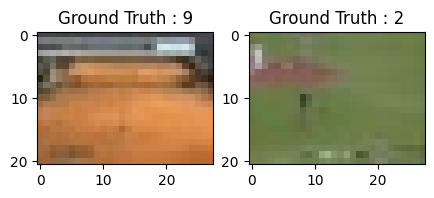

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

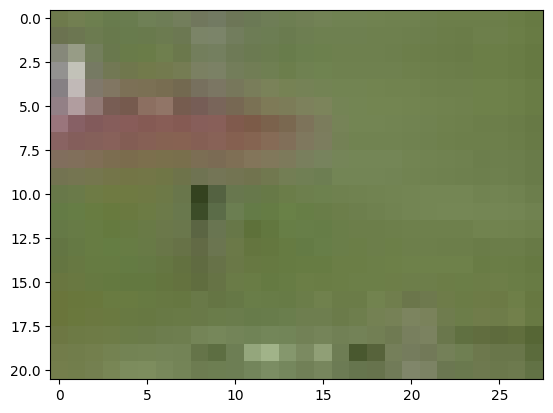

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       157,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,954 (620.91 KB)

 Trainable params: 158,954 (620.91 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# sport_model.compile(
#     loss=keras.losses.categorical_crossentropy, 
#     optimizer=tf.keras.optimizers.legacy.SGD(
#         learning_rate=INIT_LR, decay=INIT_LR / 100
#         ),
#     metrics=['accuracy'])
sport_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR),
    metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1316 - loss: 2.2907 - val_accuracy: 0.2339 - val_loss: 2.1314
Epoch 2/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2362 - loss: 2.1348 - val_accuracy: 0.4535 - val_loss: 1.9173
Epoch 3/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3091 - loss: 1.9710 - val_accuracy: 0.5457 - val_loss: 1.7308
Epoch 4/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3668 - loss: 1.8301 - val_accuracy: 0.6261 - val_loss: 1.5482
Epoch 5/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4196 - loss: 1.6920 - val_accuracy: 0.6566 - val_loss: 1.4021
Epoch 6/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4663 - loss: 1.5712 - val_accuracy: 0.6761 - val_loss: 1.2803
Epoch 7/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4988 - loss: 1.4677 - val_accuracy: 0.6905 - val_loss: 1.1748
Epoch 8/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5306 - loss: 1.3909 - val_accuracy: 0.

In [19]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("/home/likcos/setDocto/sport.h5")

# Evaluamos la red

In [20]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8284 - loss: 0.6634


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6633300185203552
Test accuracy: 0.8263970017433167


In [22]:
sport_train.history

{'accuracy': [0.16036951541900635,
  0.2534186840057373,
  0.3181864321231842,
  0.3809080123901367,
  0.4315755367279053,
  0.4730455279350281,
  0.5046696662902832,
  0.5373473167419434,
  0.5572618246078491,
  0.5808026790618896,
  0.5972123742103577,
  0.6110289692878723,
  0.6270942687988281,
  0.6378315091133118,
  0.6497032046318054,
  0.6606835126876831,
  0.6693543195724487,
  0.6804359555244446,
  0.6870201230049133,
  0.6943538188934326],
 'loss': [2.249211311340332,
  2.09354829788208,
  1.9373282194137573,
  1.792478322982788,
  1.662115216255188,
  1.5503413677215576,
  1.4510881900787354,
  1.3718169927597046,
  1.3047051429748535,
  1.2410712242126465,
  1.19289231300354,
  1.1478437185287476,
  1.1059366464614868,
  1.078155517578125,
  1.0447982549667358,
  1.0123499631881714,
  0.9918530583381653,
  0.9639735817909241,
  0.9388448596000671,
  0.9229761958122253],
 'val_accuracy': [0.23385463654994965,
  0.45352888107299805,
  0.5456607937812805,
  0.6261243224143982,

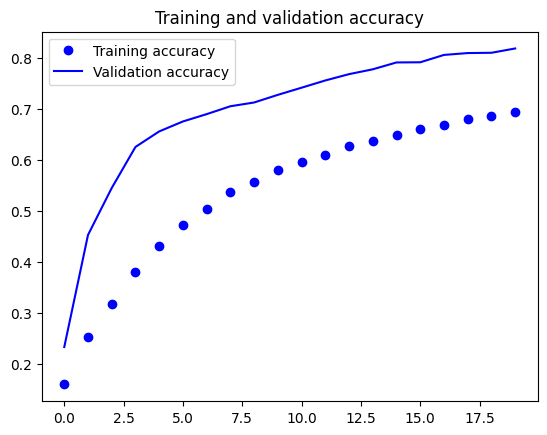

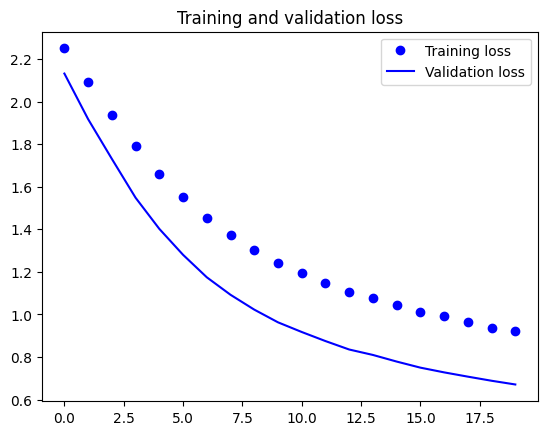

In [23]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = sport_model.predict(test_X)

483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 12748 correct labels


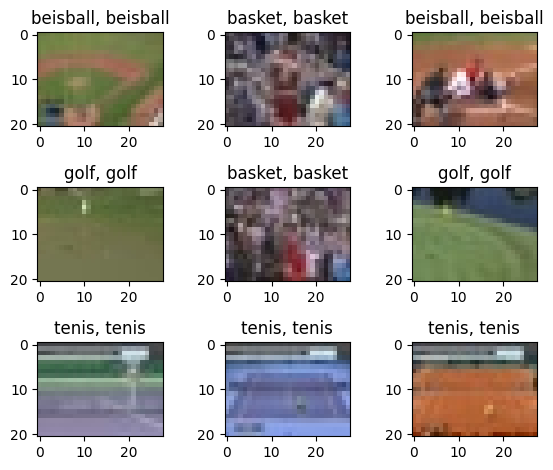

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 2678 incorrect labels


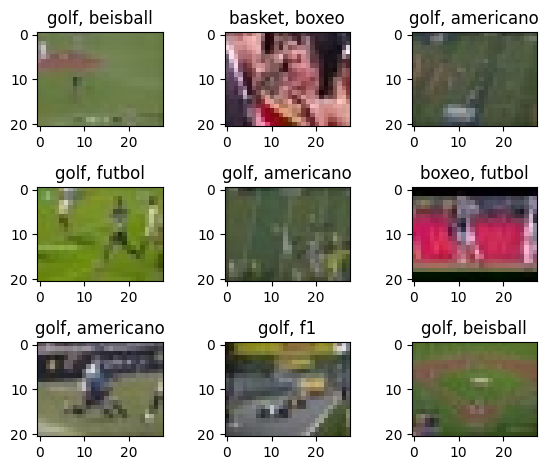

In [28]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [29]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.68      0.57      0.62      1856
     Class 1       0.77      0.88      0.82      1792
     Class 2       0.76      0.77      0.77      1543
     Class 3       0.89      0.89      0.89      1417
     Class 4       0.97      0.99      0.98      1588
     Class 5       0.80      0.45      0.58      1008
     Class 6       0.92      0.82      0.86      1505
     Class 7       0.69      0.88      0.77      1949
     Class 8       0.91      0.92      0.92      1024
     Class 9       0.99      1.00      0.99      1744

    accuracy                           0.83     15426
   macro avg       0.84      0.82      0.82     15426
weighted avg       0.83      0.83      0.82     15426



In [30]:
from skimage.transform import resize

images=[]

# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [test_folder_path + 'boxeo_0009.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
C:/git/IAClass/14_run_deports_cnn/test/boxeo_0009.jpg boxeo
